### 평가지표

In [5]:
import os
import json
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from glob import glob

# 평가 결과가 저장된 폴더
results_dir = "../results"

# 결과 파일 리스트 가져오기
result_files = sorted(glob(os.path.join(results_dir, "results_*.json")))

In [7]:
# 라벨 정규화 함수 예시
def normalize_label(label):
    label = label.lower().strip()
    if label in {"yes", "no", "maybe"}:
        return label
    # 긴 문장이나 기타 예외 처리
    if "not prepared" in label or "urgent measures" in label:
        return "no"
    elif "well positioned" in label or "can cope" in label or "ready" in label:
        return "yes"
    else:
        return "maybe"

# 평가 함수 수정
def evaluate_result_file(filepath):
    with open(filepath, "r", encoding="utf-8") as f:
        data = json.load(f)

    preds = [normalize_label(ex["prediction"]) for ex in data]
    labels = [normalize_label(ex["label"]) for ex in data]

    acc = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro', zero_division=0)

    return {
        "file": os.path.basename(filepath),
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

# 전체 결과 요약
def summarize_all_results():
    print(f"{'File':<30} {'Acc':<6} {'Prec':<6} {'Recall':<6} {'F1':<6}")
    print("-" * 60)
    for file in result_files:
        metrics = evaluate_result_file(file)
        print(f"{metrics['file']:<30} {metrics['accuracy']:.4f} {metrics['precision']:.4f} {metrics['recall']:.4f} {metrics['f1']:.4f}")


In [8]:
summarize_all_results()

File                           Acc    Prec   Recall F1    
------------------------------------------------------------
results_ia3.json               0.4800 0.3265 0.1616 0.2162
results_metaicl_k0.json        0.4500 0.3261 0.1515 0.2069
results_metaicl_k1.json        0.1700 0.3393 0.3872 0.1044
results_metaicl_k16.json       0.2200 0.5063 0.6061 0.1875
results_metaicl_k2.json        0.3500 0.5076 0.6717 0.2706
results_metaicl_k4.json        0.2900 0.3385 0.4276 0.1572
results_metaicl_k8.json        0.2400 0.5065 0.6162 0.2013
results_qwen_hf.json           0.4500 0.3261 0.1515 0.2069


### 시각화

In [12]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# 라벨 정규화 함수
def normalize_label(label):
    label = label.lower().strip()
    if label in {"yes", "no", "maybe"}:
        return label
    if "not prepared" in label or "urgent measures" in label:
        return "no"
    elif "well positioned" in label or "can cope" in label or "ready" in label:
        return "yes"
    else:
        return "maybe"

# 평가 및 confusion matrix 시각화 함수
def evaluate_result_file(filepath, plot_cm=False):
    with open(filepath, "r", encoding="utf-8") as f:
        data = json.load(f)

    preds = [normalize_label(ex["prediction"]) for ex in data]
    labels = [normalize_label(ex["label"]) for ex in data]

    acc = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro', zero_division=0)

    if plot_cm:
        cm = confusion_matrix(labels, preds, labels=["yes", "no", "maybe"])
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=["yes", "no", "maybe"],
                    yticklabels=["yes", "no", "maybe"])
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title(f"Confusion Matrix - {os.path.basename(filepath)}")
        plt.show()

    return {
        "file": os.path.basename(filepath),
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

# 결과 요약 및 시각화 호출 예시
def summarize_all_results(plot_cm=False):
    print(f"{'File':<30} {'Acc':<6} {'Prec':<6} {'Recall':<6} {'F1':<6}")
    print("-" * 60)
    for file in result_files:
        metrics = evaluate_result_file(file, plot_cm=plot_cm)
        print(f"{metrics['file']:<30} {metrics['accuracy']:.4f} {metrics['precision']:.4f} {metrics['recall']:.4f} {metrics['f1']:.4f}")


File                           Acc    Prec   Recall F1    
------------------------------------------------------------


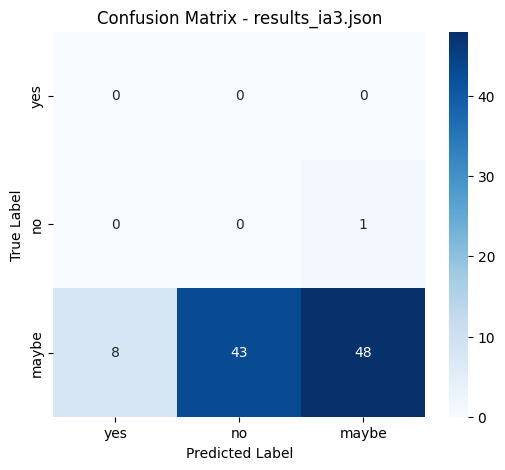

results_ia3.json               0.4800 0.3265 0.1616 0.2162


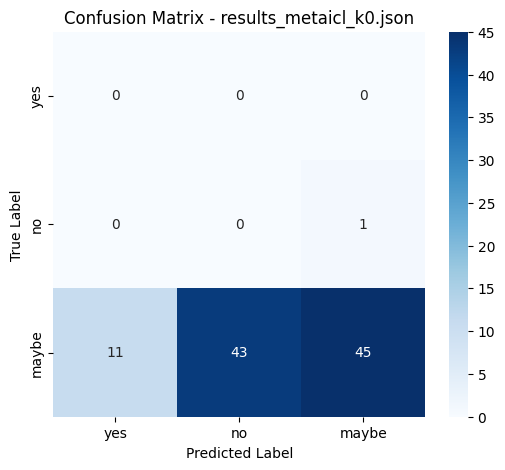

results_metaicl_k0.json        0.4500 0.3261 0.1515 0.2069


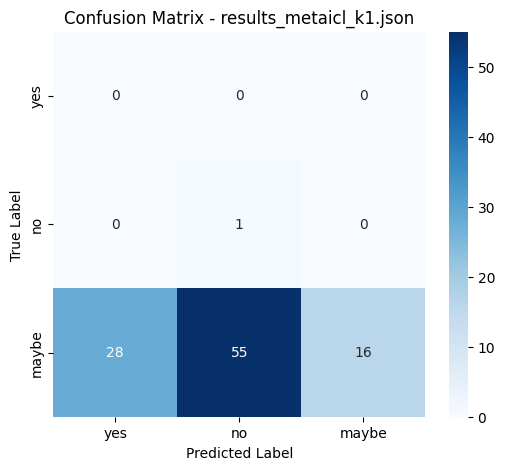

results_metaicl_k1.json        0.1700 0.3393 0.3872 0.1044


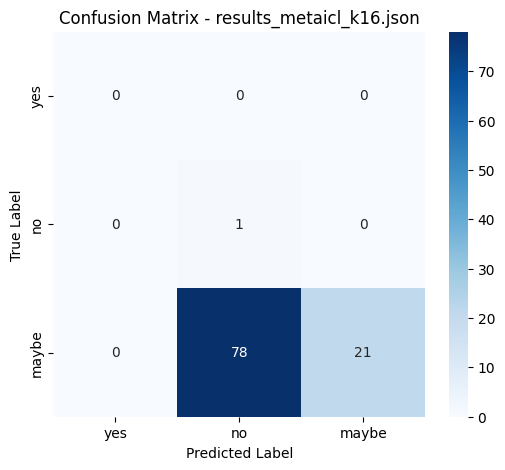

results_metaicl_k16.json       0.2200 0.5063 0.6061 0.1875


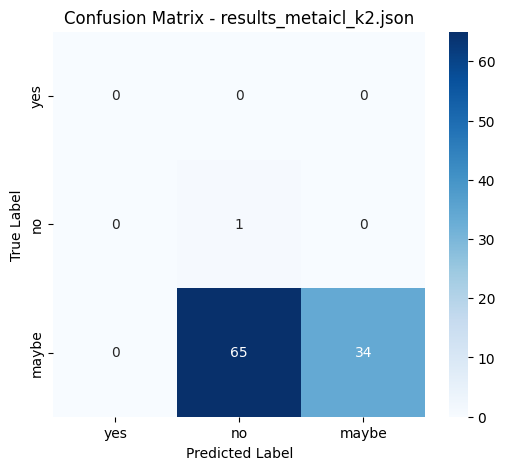

results_metaicl_k2.json        0.3500 0.5076 0.6717 0.2706


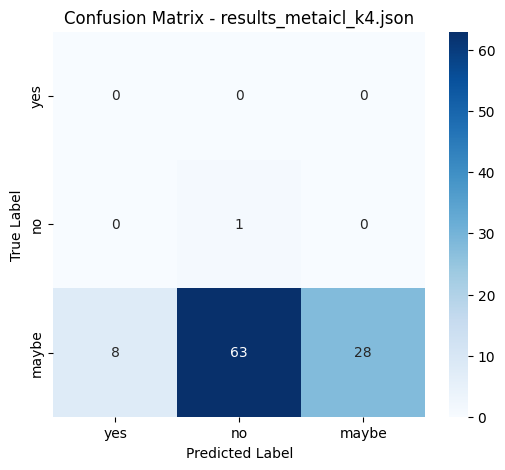

results_metaicl_k4.json        0.2900 0.3385 0.4276 0.1572


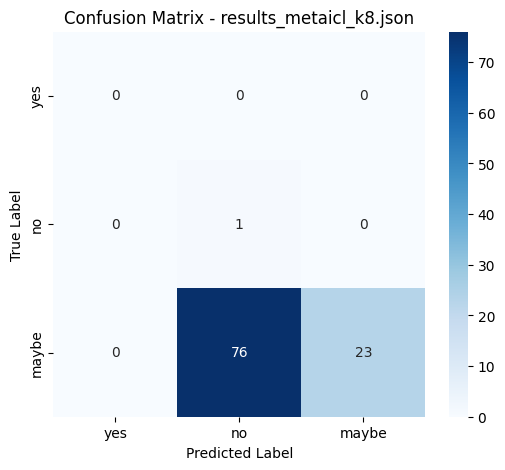

results_metaicl_k8.json        0.2400 0.5065 0.6162 0.2013


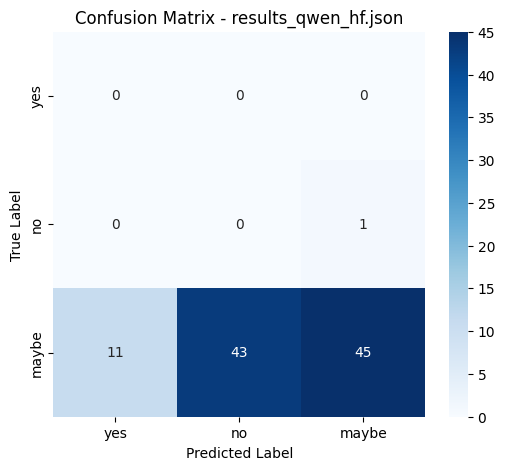

results_qwen_hf.json           0.4500 0.3261 0.1515 0.2069


In [18]:
summarize_all_results(plot_cm=True)